Импортируем нужные библиотеки

In [17]:
import plotly.express as px
# это бесплатная графическая библиотека, позволяющая создавать визуализации данных.
import pandas as pd
import osmnx as ox
# это библиотека геопространственных данных OpenStreetMap
import geopandas as gpd
# это библиотека для обработки и анализа геоданных с использованием привычных для Pandas структур данных
from geopy.geocoders import Nominatim
# это библиотека, которая предоставляет удобный способ работать с геоданными
import matplotlib.pyplot as plt

In [26]:
def map(df):
    #  функция для показа карты
    fig = px.scatter_map(df, lat="lat", lon="lon", hover_name="name",
                            color_discrete_sequence=["red"], zoom=10, height=300)
    fig.update_layout(map_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

Пример работы для одной координаты

Документация:
- https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scattermap.html
- https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
  
1. Figure может быть представлена как в виде словаря, так и в виде экземпляров plotly.graph_objects.Figure, и перед передачей в plotly.js они сериализуются как JSON.
2. Scattermap — это класс в библиотеке Plotly, который представляет собой низкоуровневый интерфейс для работы с фигурами, трассировками и макетом. Данные, визуализируемые в виде точек, линий или маркеров на географической карте MapLibre GL, представлены парами координат долготы и широты в lon и lat.
   

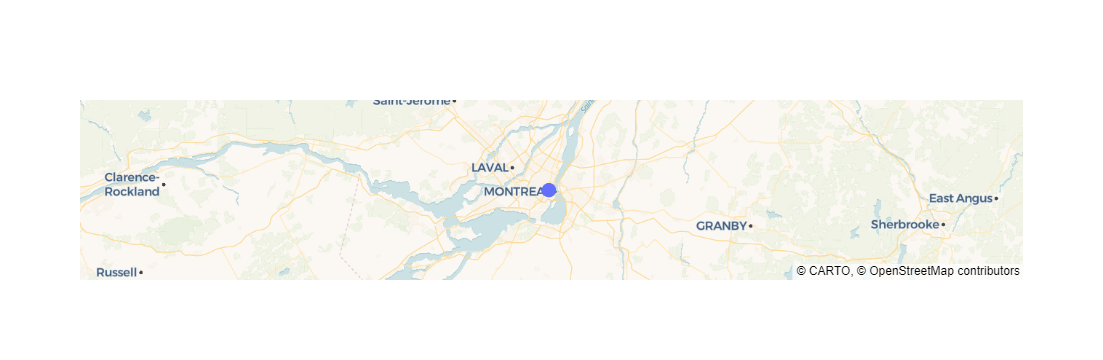

In [16]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermap(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermap.Marker(
            size=15
        ),
        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    map=dict(
        bearing=0,
        center=go.layout.map.Center(
            lat=45.5,
            lon=-73.6
        ),
        zoom=7
    )
)

fig.show()

In [24]:
def plot_nearby_places(address, distance=500):
    # Инициализируем геоколлектор
    geolocator = Nominatim(user_agent="i2d")

    # Получаем координаты по адресу
    location = geolocator.geocode(address)
    if location is None:
        print("Не удалось найти адрес.")
        return

    # Получаем координаты
    latitude = location.latitude
    longitude = location.longitude

    
    # Находим заведения поблизости
    tags = {'amenity': True}
    nearby_places = ox.features.features_from_point((latitude, longitude), dist=distance, tags=tags)
    data_lon = []
    data_lat = []
    nearby_places = nearby_places[['name', 'geometry']]
    n_p = nearby_places.copy(deep=True)
    indexes_to_del = []
    for i, r in nearby_places.iterrows():
        # print((r['geometry']))
        if str(r['geometry']).startswith("POINT"):
            x,y = r['geometry'].x,r['geometry'].y
            data_lon.append(x)
            data_lat.append(y)
        else:
            indexes_to_del.append(i)
            
    n_p = nearby_places.drop(indexes_to_del)
    n_p['lon'] = data_lon
    n_p['lat'] = data_lat
        

    print(n_p)
    map(n_p)

                                  name                   geometry        lon  \
element_type osmid                                                             
node         529550640             ВТБ  POINT (37.61398 55.75714)  37.613981   
             784052391             NaN  POINT (37.61735 55.75486)  37.617345   
             1074714681   Фестивальное  POINT (37.62266 55.75453)  37.622660   
             1074714701            NaN  POINT (37.62280 55.75402)  37.622805   
             1074714713   Столовая №57  POINT (37.62336 55.75421)  37.623361   
...                                ...                        ...        ...   
             12198973957      Öz kebab  POINT (37.62745 55.75709)  37.627445   
             12273425606    Varvarka 3  POINT (37.62623 55.75374)  37.626226   
             12292422363        Kurnik  POINT (37.62203 55.75515)  37.622030   
             12309870577           NaN  POINT (37.62134 55.75704)  37.621337   
             12309870596           NaN  

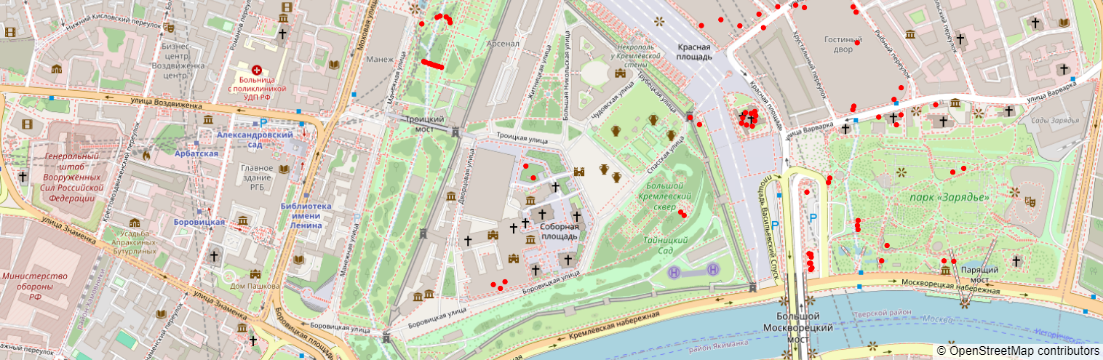

In [25]:
plot_nearby_places("Россия, Москва, Красная Площадь")